In [1]:
import yfinance as yf
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
ma_stock=yf.download("MA", start="2023-01-01", end="2024-01-01")
print(ma_stock.head())

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open   Volume
Ticker              MA          MA          MA          MA       MA
Date                                                               
2023-01-03  342.209991  349.965978  339.387859  345.328172  2933600
2023-01-04  350.449524  352.255320  345.061796  346.739309  2661000
2023-01-05  347.114258  352.827635  346.620875  351.406691  2608500
2023-01-06  363.392670  364.430442  351.186339  353.153179  4432800
2023-01-09  366.654297  370.637412  365.260697  367.306622  3913500


In [11]:
ma_stock.dropna(inplace=True)
ma_stock.reset_index(inplace=True)
ma_stock.head()

Price,index,Date,Close,High,Low,Open,Volume
Ticker,,,MA,MA,MA,MA,MA
0,0,2023-01-03,342.209991,349.965978,339.387859,345.328172,2933600
1,1,2023-01-04,350.449524,352.255320,345.061796,346.739309,2661000
2,2,2023-01-05,347.114258,352.827635,346.620875,351.406691,2608500
3,3,2023-01-06,363.392670,364.430442,351.186339,353.153179,4432800
4,4,2023-01-09,366.654297,370.637412,365.260697,367.306622,3913500


In [9]:
ma_stock.describe()

Price,Date,Close,High,Low,Open,Volume
Ticker,,MA,MA,MA,MA,MA
count,250,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,2023-07-02 09:18:43.200000,381.914232,384.635039,378.829396,381.645328,2.635630e+06
min,2023-01-03 00:00:00,340.699768,344.346802,336.252119,339.632346,1.053500e+06
25%,2023-04-03 06:00:00,366.664177,370.187639,364.092127,366.009475,2.048100e+06
50%,2023-07-04 00:00:00,381.262451,383.855100,378.546257,380.860625,2.439350e+06
75%,2023-10-01 06:00:00,396.690224,399.571176,393.710444,396.462189,2.938700e+06
max,2023-12-29 00:00:00,423.432983,425.269584,421.209123,423.601740,1.069530e+07
std,NaN,20.341835,20.081438,20.556274,20.370486,9.994585e+05


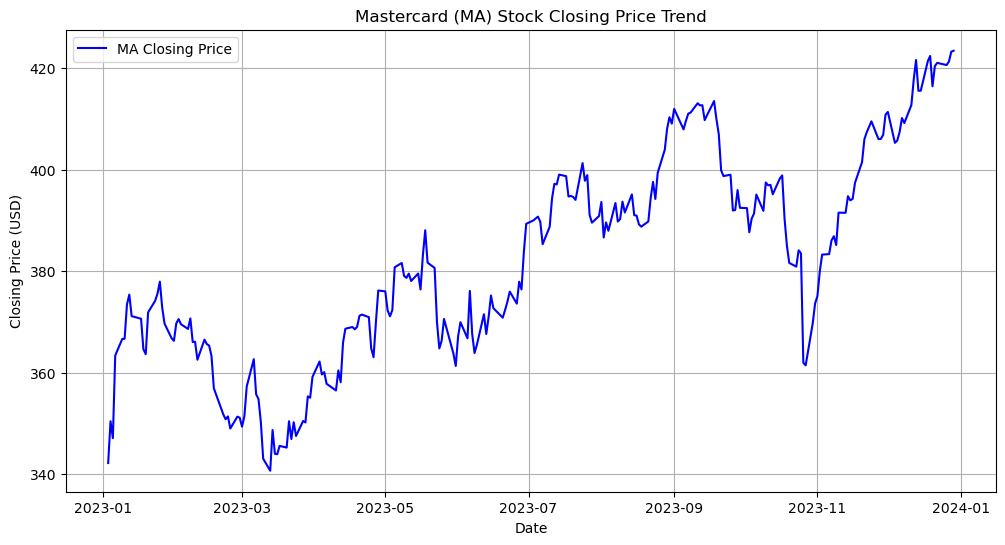

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(ma_stock['Date'], ma_stock['Close'], label="MA Closing Price", color='blue')

plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.title("Mastercard (MA) Stock Closing Price Trend")
plt.legend()
plt.grid()

plt.show()

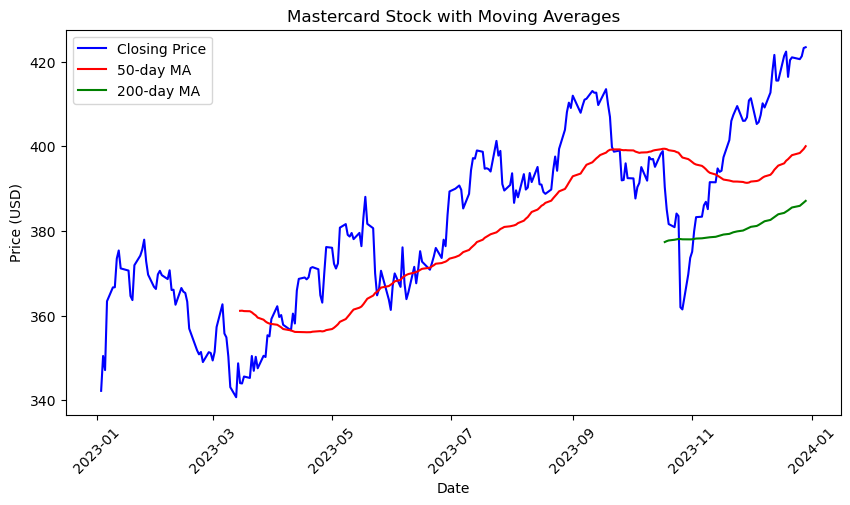

In [15]:
ma_stock['50-day MA'] = ma_stock['Close'].rolling(window=50).mean()
ma_stock['200-day MA'] = ma_stock['Close'].rolling(window=200).mean()

plt.figure(figsize=(10,5))
plt.plot(ma_stock['Date'], ma_stock['Close'], label='Closing Price', color='blue')
plt.plot(ma_stock['Date'], ma_stock['50-day MA'], label='50-day MA', color='red')
plt.plot(ma_stock['Date'], ma_stock['200-day MA'], label='200-day MA', color='green')

plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title('Mastercard Stock with Moving Averages')
plt.legend()
plt.xticks(rotation=45)
plt.show()

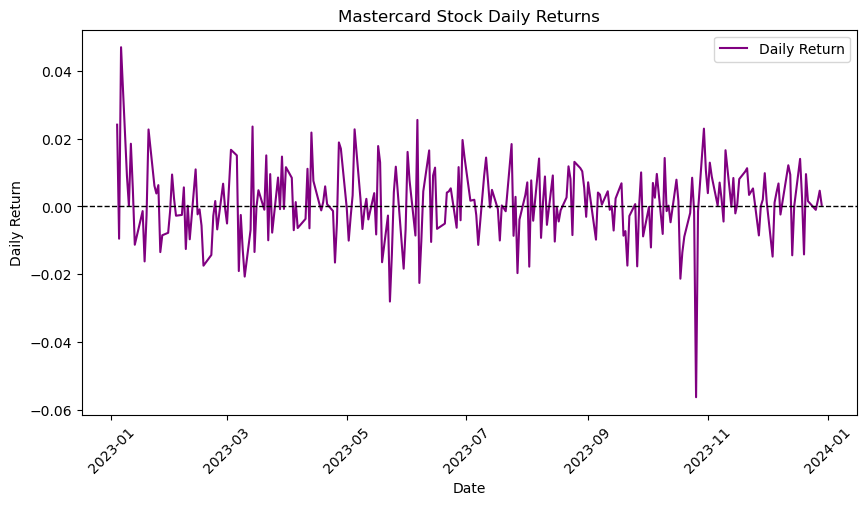

In [17]:
ma_stock['Daily Return'] = ma_stock['Close'].pct_change()

plt.figure(figsize=(10, 5))
plt.plot(ma_stock['Date'], ma_stock['Daily Return'], color='purple', label='Daily Return')

plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.title('Mastercard Stock Daily Returns')
plt.legend()
plt.xticks(rotation=45)
plt.show()

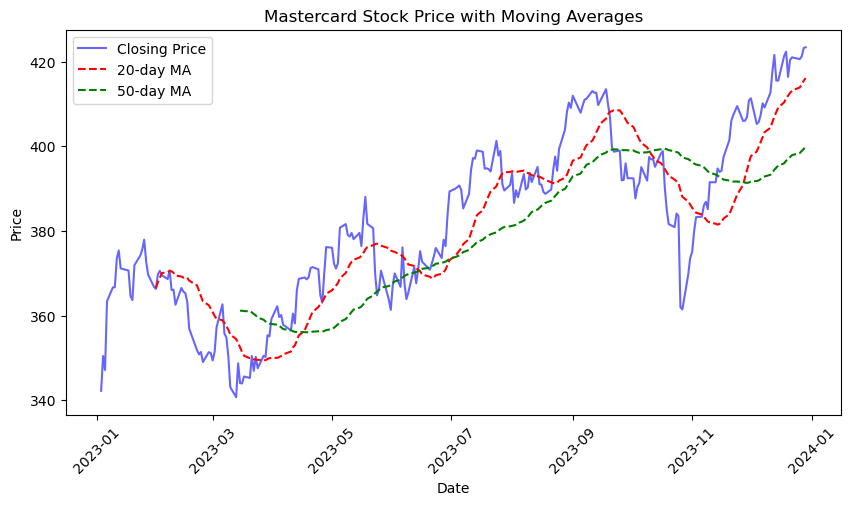

In [19]:
ma_stock['MA_20'] = ma_stock['Close'].rolling(window=20).mean()
ma_stock['MA_50'] = ma_stock['Close'].rolling(window=50).mean()

plt.figure(figsize=(10, 5))
plt.plot(ma_stock['Date'], ma_stock['Close'], label='Closing Price', color='blue', alpha=0.6)
plt.plot(ma_stock['Date'], ma_stock['MA_20'], label='20-day MA', color='red', linestyle='dashed')
plt.plot(ma_stock['Date'], ma_stock['MA_50'], label='50-day MA', color='green', linestyle='dashed')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Mastercard Stock Price with Moving Averages')
plt.legend()
plt.xticks(rotation=45)
plt.show()

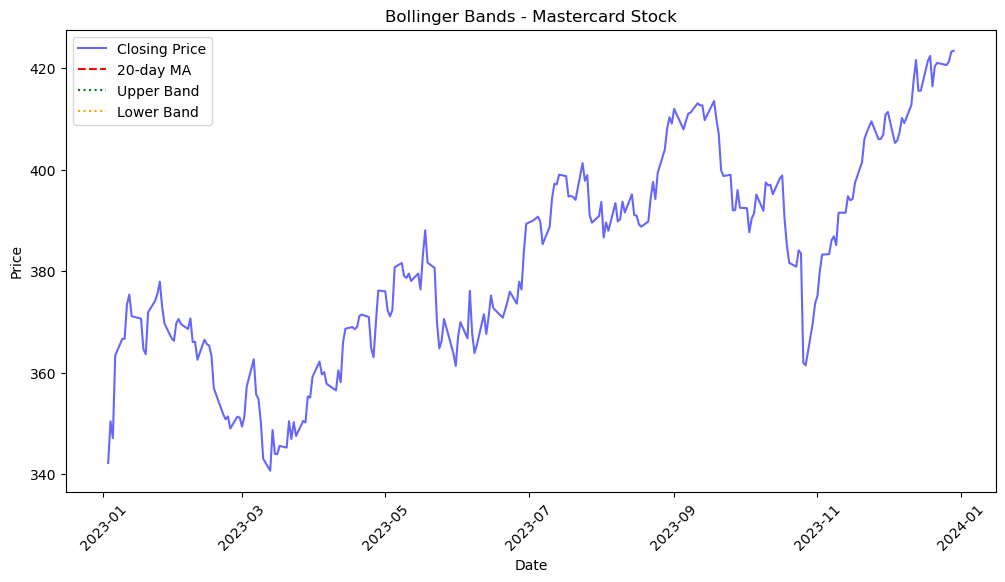

In [21]:
ma_stock['MA_20'] = ma_stock['Close'].rolling(window=20).mean()

ma_stock['STD_20'] = ma_stock['Close'].rolling(window=20).std()

ma_stock['Upper_Band'] = ma_stock['MA_20'] + (ma_stock['STD_20'] * 2)
ma_stock['Lower_Band'] = ma_stock['MA_20'] - (ma_stock['STD_20'] * 2)

plt.figure(figsize=(12, 6))
plt.plot(ma_stock['Date'], ma_stock['Close'], label='Closing Price', color='blue', alpha=0.6)
plt.plot(ma_stock['Date'], ma_stock['MA_20'], label='20-day MA', color='red', linestyle='dashed')
plt.plot(ma_stock['Date'], ma_stock['Upper_Band'], label='Upper Band', color='green', linestyle='dotted')
plt.plot(ma_stock['Date'], ma_stock['Lower_Band'], label='Lower Band', color='orange', linestyle='dotted')

plt.fill_between(ma_stock['Date'], ma_stock['Lower_Band'], ma_stock['Upper_Band'], color='gray', alpha=0.2)

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Bollinger Bands - Mastercard Stock')
plt.legend()
plt.xticks(rotation=45)
plt.show()

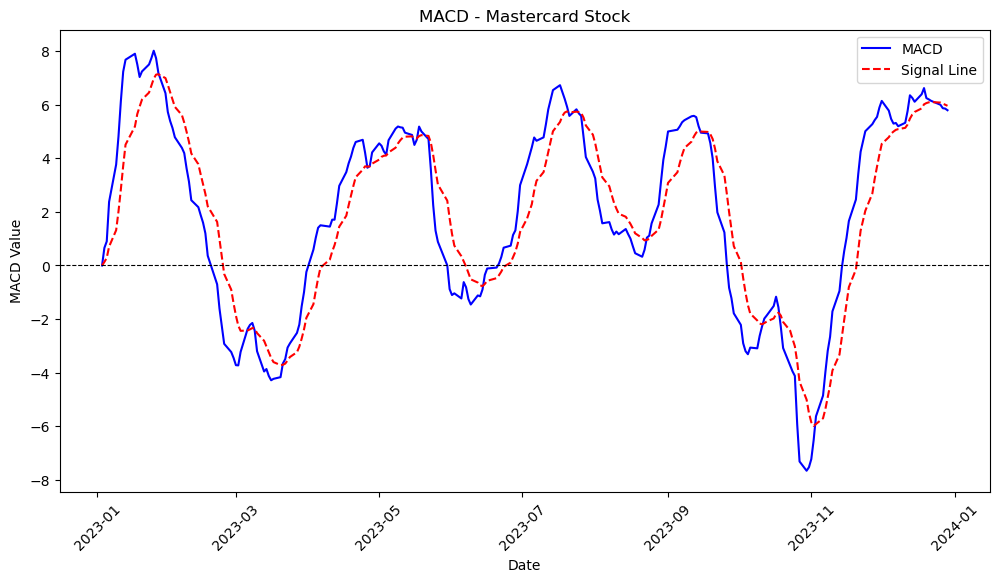

In [23]:
ma_stock['EMA_12'] = ma_stock['Close'].ewm(span=12, adjust=False).mean()
ma_stock['EMA_26'] = ma_stock['Close'].ewm(span=26, adjust=False).mean()

ma_stock['MACD'] = ma_stock['EMA_12'] - ma_stock['EMA_26']

ma_stock['Signal_Line'] = ma_stock['MACD'].ewm(span=9, adjust=False).mean()

plt.figure(figsize=(12, 6))
plt.plot(ma_stock['Date'], ma_stock['MACD'], label='MACD', color='blue')
plt.plot(ma_stock['Date'], ma_stock['Signal_Line'], label='Signal Line', color='red', linestyle='dashed')

plt.xlabel('Date')
plt.ylabel('MACD Value')
plt.title('MACD - Mastercard Stock')
plt.legend()
plt.xticks(rotation=45)
plt.axhline(y=0, color='black', linestyle='--', linewidth=0.8)
plt.show()

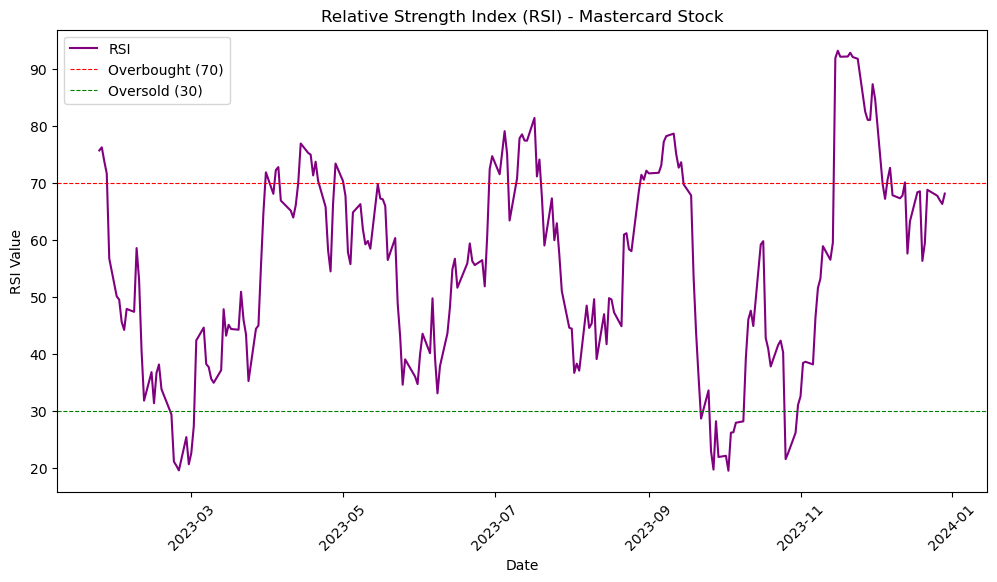

In [25]:
def calculate_rsi(data, window=14):
    delta = data.diff()  # Calculate price difference
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    
    rs = gain / loss  # Relative Strength
    rsi = 100 - (100 / (1 + rs))  # RSI Formula
    
    return rsi

ma_stock['RSI'] = calculate_rsi(ma_stock['Close'])

plt.figure(figsize=(12, 6))
plt.plot(ma_stock['Date'], ma_stock['RSI'], label='RSI', color='purple')

plt.axhline(y=70, color='red', linestyle='--', linewidth=0.8, label='Overbought (70)')
plt.axhline(y=30, color='green', linestyle='--', linewidth=0.8, label='Oversold (30)')

plt.xlabel('Date')
plt.ylabel('RSI Value')
plt.title('Relative Strength Index (RSI) - Mastercard Stock')
plt.legend()
plt.xticks(rotation=45)
plt.show()

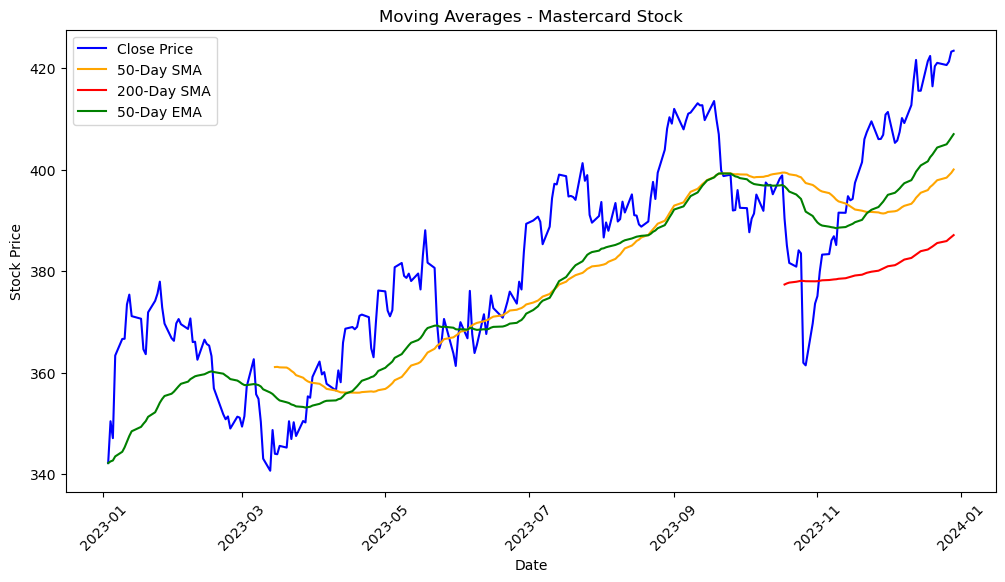

In [27]:
ma_stock['SMA_50'] = ma_stock['Close'].rolling(window=50).mean()

ma_stock['SMA_200'] = ma_stock['Close'].rolling(window=200).mean()

ma_stock['EMA_50'] = ma_stock['Close'].ewm(span=50, adjust=False).mean()


plt.figure(figsize=(12, 6))
plt.plot(ma_stock['Date'], ma_stock['Close'], label='Close Price', color='blue')
plt.plot(ma_stock['Date'], ma_stock['SMA_50'], label='50-Day SMA', color='orange')
plt.plot(ma_stock['Date'], ma_stock['SMA_200'], label='200-Day SMA', color='red')
plt.plot(ma_stock['Date'], ma_stock['EMA_50'], label='50-Day EMA', color='green')

plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Moving Averages - Mastercard Stock')
plt.legend()
plt.xticks(rotation=45)
plt.show()

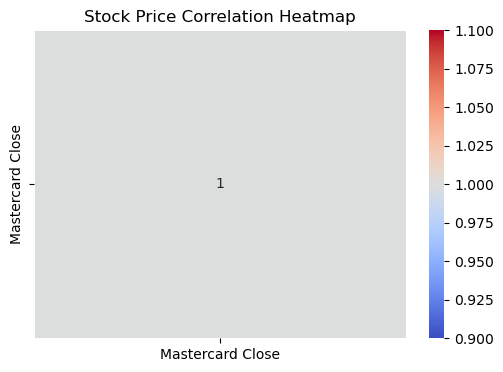

In [29]:
correlation_data = ma_stock[['Close']].copy()
correlation_data.columns = ['Mastercard Close']

correlation_matrix = correlation_data.corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

plt.title('Stock Price Correlation Heatmap')
plt.show()

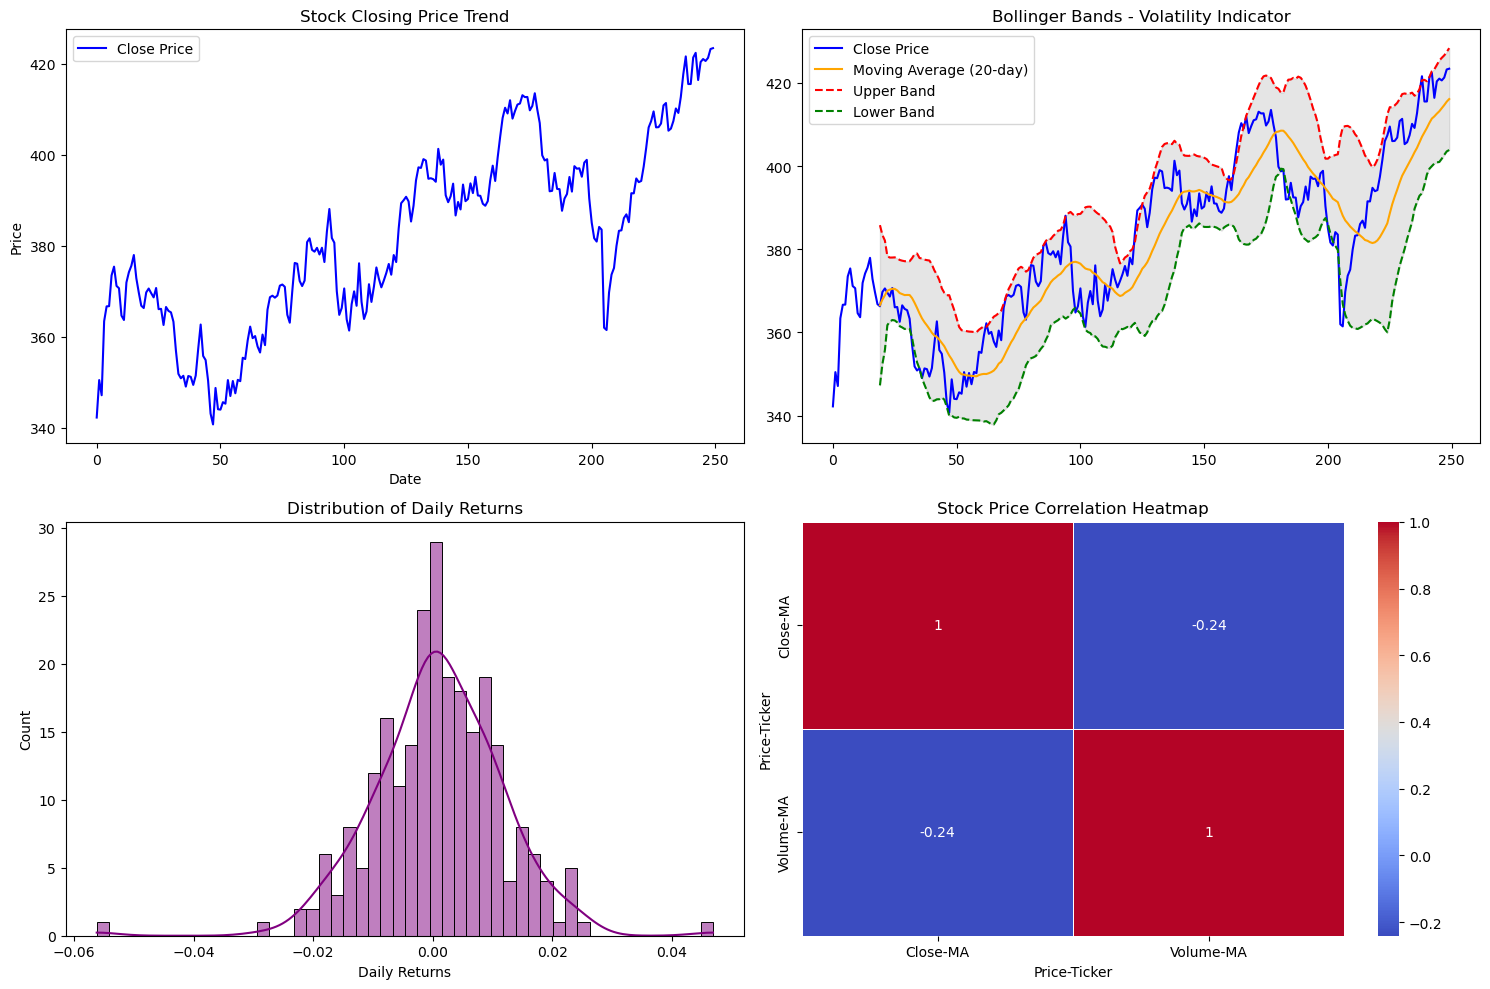

In [31]:
window = 20
ma_stock['SMA'] = ma_stock['Close'].rolling(window=window).mean()
ma_stock['STD'] = ma_stock['Close'].rolling(window=window).std()
ma_stock['Upper Band'] = ma_stock['SMA'] + (2 * ma_stock['STD'])
ma_stock['Lower Band'] = ma_stock['SMA'] - (2 * ma_stock['STD'])

ma_stock['Daily Returns'] = ma_stock['Close'].pct_change()

fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# 1. Stock Closing Price Trend

axs[0, 0].plot(ma_stock['Close'], label="Close Price", color="blue")
axs[0, 0].set_title("Stock Closing Price Trend")
axs[0, 0].set_xlabel("Date")
axs[0, 0].set_ylabel("Price")
axs[0, 0].legend()

# 2. Bollinger Bands

axs[0, 1].plot(ma_stock['Close'], label='Close Price', color='blue')
axs[0, 1].plot(ma_stock['SMA'], label='Moving Average (20-day)', color='orange')
axs[0, 1].plot(ma_stock['Upper Band'], label='Upper Band', linestyle='dashed', color='red')
axs[0, 1].plot(ma_stock['Lower Band'], label='Lower Band', linestyle='dashed', color='green')
axs[0, 1].fill_between(ma_stock.index, ma_stock['Upper Band'], ma_stock['Lower Band'], color='gray', alpha=0.2)
axs[0, 1].set_title("Bollinger Bands - Volatility Indicator")
axs[0, 1].legend()

# 3. Daily Returns Distribution

sns.histplot(ma_stock['Daily Returns'].dropna(), bins=50, kde=True, ax=axs[1, 0], color="purple")
axs[1, 0].set_title("Distribution of Daily Returns")

# 4. Correlation Matrix Heatmap

correlation_matrix = ma_stock[['Close', 'Volume']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5, ax=axs[1, 1])
axs[1, 1].set_title("Stock Price Correlation Heatmap")

plt.tight_layout()
plt.show()